In [1]:
print("HELLO")

HELLO


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
%pip install wordcloud

In [6]:
import pandas as pd

# Read CSV with error handling
try:
    data = pd.read_csv("Review_db.csv", error_bad_lines=False)
    print("Data loaded successfully.")
except pd.errors.ParserError as e:
    print("Error parsing CSV:", e)


<ipython-input-6-1229d9dc8b26>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv("Review_db.csv", error_bad_lines=False)


Data loaded successfully.


In [7]:
# Load the data
data = pd.read_csv("Review_db.csv")

# Display the shape of the DataFrame
print("Dataset shape:", data.shape)

Dataset shape: (144298, 7)


In [8]:
data.head()

,City,Place,Review,Rating,Name,Date,Raw_Review
0,Aamby Valley City,19 Degree North,aamby valley beautiful place clear blue skies ...,5,Anonymous,NaN,Aamby valley is a beautiful place with its cle...
1,Aamby Valley City,19 Degree North,executed obt akshay thanx team thoroughly enjo...,4,Anonymous,NaN,Very well executed obt by Akshay.... Thanx as ...
2,Aamby Valley City,19 Degree North,awesome experience atv tracts obstacles mainta...,5,Anonymous,NaN,Awesome experience at the ATV\nTracts and obst...
3,Aamby Valley City,19 Degree North,visited aamby valley yesterday short excursion...,4,Anonymous,NaN,we visited the Aamby Valley yesterday for shor...
4,Aamby Valley City,19 Degree North,far mumbai place finest adventure places visit...,5,Anonymous,NaN,"Not far from Mumbai, this place is one of the ..."


In [9]:
#Column names

print(f"Feature names : {data.columns.values}")

Feature names : ['City' 'Place' 'Review' 'Rating' 'Name' 'Date' 'Raw_Review']


In [10]:
#Check for null values

data.isnull().sum()

City               0
Place              0
Review             0
Rating             0
Name               0
Date          144298
Raw_Review         0
dtype: int64

In [11]:
import pandas as pd

# Assuming 'data' is your DataFrame

# Drop the 'Date' column
data = data.drop(columns=['Date'])

# Print the DataFrame to verify the column has been dropped
print(data.head())


                City            Place  \
0  Aamby Valley City  19 Degree North   
1  Aamby Valley City  19 Degree North   
2  Aamby Valley City  19 Degree North   
3  Aamby Valley City  19 Degree North   
4  Aamby Valley City  19 Degree North   

                                              Review  Rating       Name  \
0  aamby valley beautiful place clear blue skies ...       5  Anonymous   
1  executed obt akshay thanx team thoroughly enjo...       4  Anonymous   
2  awesome experience atv tracts obstacles mainta...       5  Anonymous   
3  visited aamby valley yesterday short excursion...       4  Anonymous   
4  far mumbai place finest adventure places visit...       5  Anonymous   

                                          Raw_Review  
0  Aamby valley is a beautiful place with its cle...  
1  Very well executed obt by Akshay.... Thanx as ...  
2  Awesome experience at the ATV\nTracts and obst...  
3  we visited the Aamby Valley yesterday for shor...  
4  Not far from Mumbai, thi

In [12]:
data.head()

,City,Place,Review,Rating,Name,Raw_Review
0,Aamby Valley City,19 Degree North,aamby valley beautiful place clear blue skies ...,5,Anonymous,Aamby valley is a beautiful place with its cle...
1,Aamby Valley City,19 Degree North,executed obt akshay thanx team thoroughly enjo...,4,Anonymous,Very well executed obt by Akshay.... Thanx as ...
2,Aamby Valley City,19 Degree North,awesome experience atv tracts obstacles mainta...,5,Anonymous,Awesome experience at the ATV\nTracts and obst...
3,Aamby Valley City,19 Degree North,visited aamby valley yesterday short excursion...,4,Anonymous,we visited the Aamby Valley yesterday for shor...
4,Aamby Valley City,19 Degree North,far mumbai place finest adventure places visit...,5,Anonymous,"Not far from Mumbai, this place is one of the ..."


In [13]:
#Check for null values

data.isnull().sum()

City          0
Place         0
Review        0
Rating        0
Name          0
Raw_Review    0
dtype: int64

In [14]:
#Creating a new column 'length' that will contain the length of the string in 'Review' column

data['length'] = data['Review'].apply(len)

In [15]:
data.head()

,City,Place,Review,Rating,Name,Raw_Review,length
0,Aamby Valley City,19 Degree North,aamby valley beautiful place clear blue skies ...,5,Anonymous,Aamby valley is a beautiful place with its cle...,182
1,Aamby Valley City,19 Degree North,executed obt akshay thanx team thoroughly enjo...,4,Anonymous,Very well executed obt by Akshay.... Thanx as ...,80
2,Aamby Valley City,19 Degree North,awesome experience atv tracts obstacles mainta...,5,Anonymous,Awesome experience at the ATV\nTracts and obst...,109
3,Aamby Valley City,19 Degree North,visited aamby valley yesterday short excursion...,4,Anonymous,we visited the Aamby Valley yesterday for shor...,164
4,Aamby Valley City,19 Degree North,far mumbai place finest adventure places visit...,5,Anonymous,"Not far from Mumbai, this place is one of the ...",107


In [16]:
#Randomly checking for 10th record

print(f"'Review' column value: {data.iloc[10]['Review']}") #Original value
print(f"Length of review : {len(data.iloc[10]['Review'])}") #Length of review using len()
print(f"'length' column value : {data.iloc[10]['length']}") #Value of the column 'length'

'Review' column value: driver stopped way jaipur honestly idea seeing soon unesco world heritage site free enter beware guides waiting entrance
Length of review : 120
'length' column value : 120


In [17]:
data.dtypes

City          object
Place         object
Review        object
Rating         int64
Name          object
Raw_Review    object
length         int64
dtype: object

In [18]:
len(data)

144298

In [19]:
#Distinct values of 'rating' and its count

print(f"Rating value count: \n{data['Rating'].value_counts()}")

Rating value count: 
5    69408
4    48492
3    19522
2     5870
1     1006
Name: Rating, dtype: int64


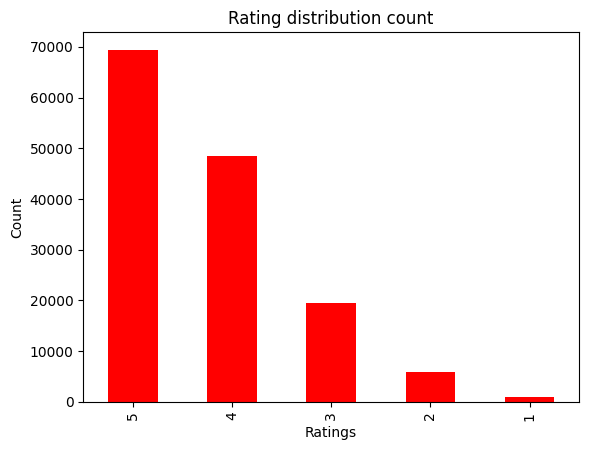

In [20]:
#Bar plot to visualize the total counts of each rating

data['Rating'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [ ]:
#Finding the percentage distribution of each rating - we'll divide the number of records for each rating by total number of records

print(f"Rating value count - percentage distribution: \n{round(data['rating'].value_counts()/data.shape[0]*100,2)}")

In [21]:
# Finding the percentage distribution of each rating
rating_distribution = round(data['Rating'].value_counts() / data.shape[0] * 100, 2)
print(f"Rating value count - percentage distribution:\n{rating_distribution}")


Rating value count - percentage distribution:
5    48.10
4    33.61
3    13.53
2     4.07
1     0.70
Name: Rating, dtype: float64


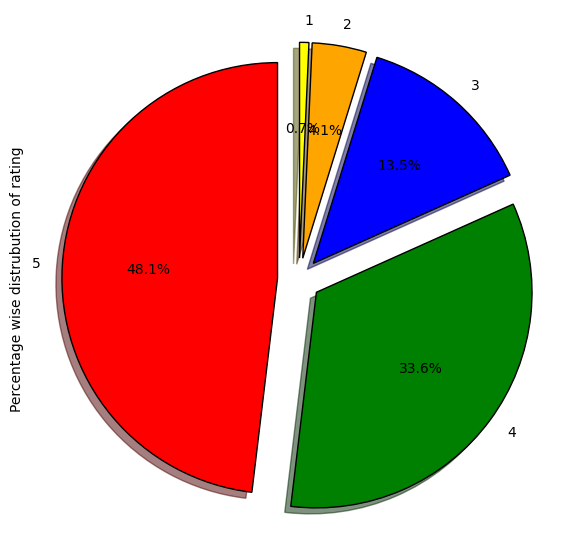

In [22]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green', 'blue','orange','yellow')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['Rating'].value_counts()/data.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")

In [27]:
unique_places = data['Place'].unique()
print(unique_places)


['19 Degree North' 'Chand Baori (Step well)' 'Harshat Mata Temple' ...
 'Bannerghatta Biological Park' 'Bangalore Revival Center'
 'Bannerghatta National Park']


In [28]:
place_counts = data['Place'].value_counts()
print(place_counts)

Taj Mahal                              23231
Agra Fort                               8570
Golden Temple                           8096
Baga Beach                              6552
Jallianwala Bagh                        3090
                                       ...  
Pushpak Gurudwara                          1
Gundi Sri Laxminarayana Temple             1
Sri Sanyasikatte Parashurama temple        1
The Lotus Houseboat                        1
Ram Thakur's Ashram                        1
Name: Place, Length: 1304, dtype: int64


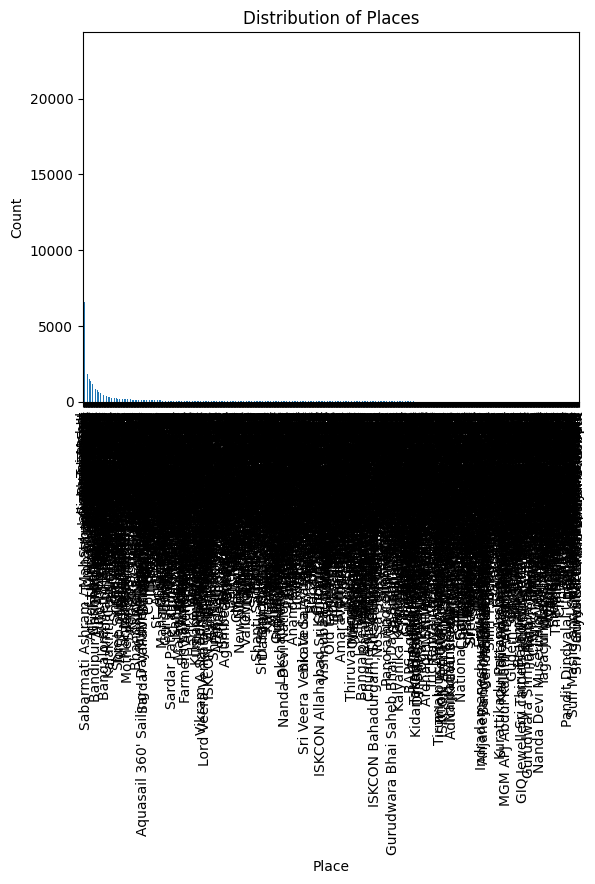

In [29]:
import matplotlib.pyplot as plt

# Plot a bar chart of place counts
place_counts.plot(kind='bar')
plt.xlabel('Place')
plt.ylabel('Count')
plt.title('Distribution of Places')
plt.show()


In [30]:
ratings_by_place = data.groupby('Place')['Rating'].mean()
print(ratings_by_place)


Place
1 MG Lido Mall             4.261682
10 Acres Mall              3.200000
19 Degree North            4.588235
AAN Adventure              5.000000
AMU Jama Masjid            4.142857
                             ...   
Zoya Holidays              4.875000
ak The Seasons             4.250000
anna gray                  3.000000
movieEX                    5.000000
vijay laxmi Handicrafts    4.333333
Name: Rating, Length: 1304, dtype: float64


In [31]:
reviews_by_place = data.groupby('Place')['Review'].apply(list)
print(reviews_by_place['19 Degree North'])  # Example: Extract reviews for '19 Degree North'


['aamby valley beautiful place clear blue skies fresh green grass family visited aamby valley celebrate mother birthday mom splendid time thanks pinky bharadwaj handling booking bombay', 'executed obt akshay thanx team thoroughly enjoyed especially frame treasure hunt', 'awesome experience atv tracts obstacles maintained safe challenging blast good experience helpful instructors', 'visited aamby valley yesterday short excursion trip mumbai drove travel time approx hours city clean away polluted air mumbai lunch woodpecker hotel truly impressed', 'far mumbai place finest adventure places visited recent times worth going safety standards maintained enjoy', 'yearn adrenaline rush place try atv forester mins rush loads stuff including kiddie zip line liked beautiful mountain backdrop whizz', 'great adventure place recommend x jungle safari special thanks mr rajesh offers zorbing rappelling wall climbing paintball following international safety standards equipments maintained', 'visited adv

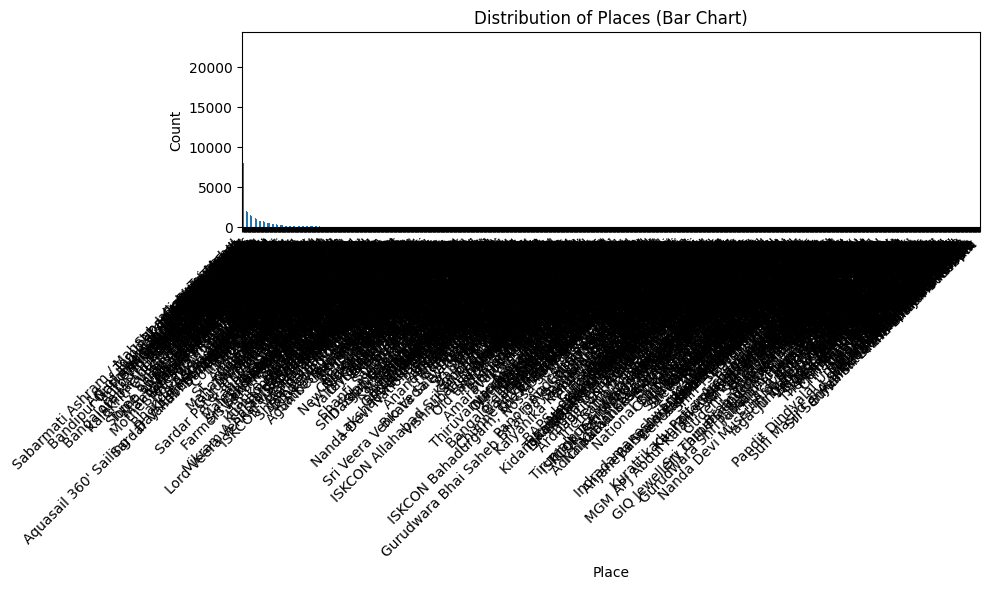

In [32]:
import matplotlib.pyplot as plt

# Count the occurrences of each place
place_counts = data['Place'].value_counts()

# Plot a bar chart of place counts
plt.figure(figsize=(10, 6))
place_counts.plot(kind='bar')
plt.xlabel('Place')
plt.ylabel('Count')
plt.title('Distribution of Places (Bar Chart)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




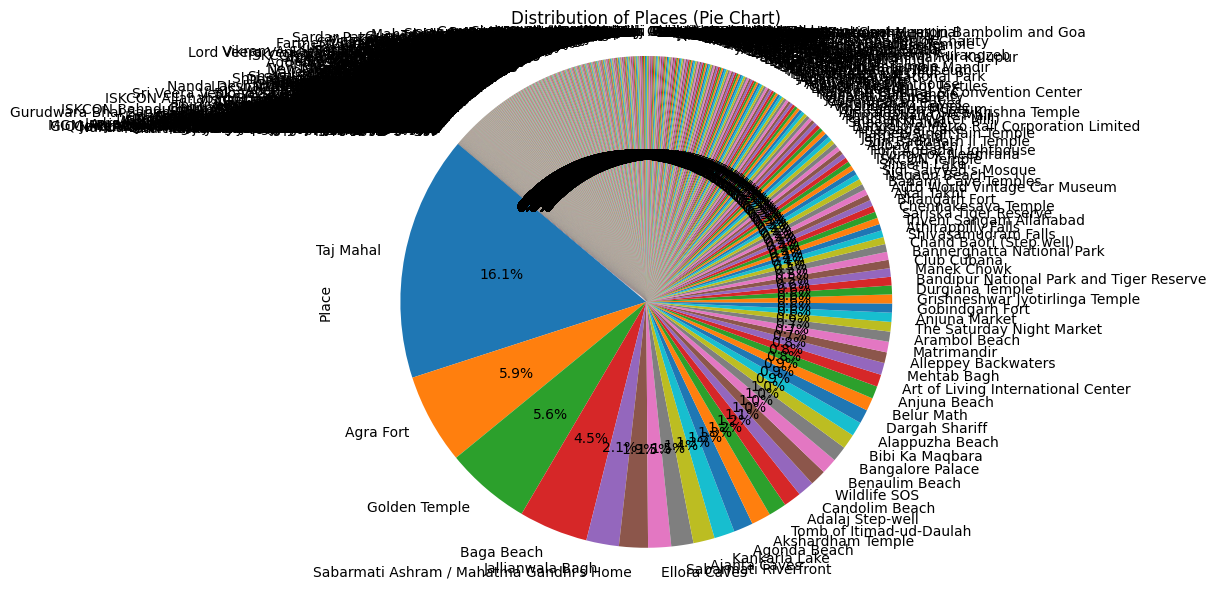

In [33]:
# Plot a pie chart of place counts
plt.figure(figsize=(10, 6))
place_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Places (Pie Chart)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

In [34]:
unique_cities = data['City'].unique()
print(unique_cities)


['Aamby Valley City' 'Abhaneri' 'Achooranam' 'Acharapakkam' 'Achrol'
 'Adilabad' 'Adimaly' 'Adipur' 'Adoni' 'Adoor' 'Agartala' 'Agatti'
 'Agonda' 'Agra' 'Tajganj' 'Mohali' 'Agumbe' 'Etmadpur' 'Ahmedabad'
 'Kalol' 'Ahmednagar' 'Aizawl' 'Ahwa' 'Airari' 'Ajanta' 'Ajmer' 'Pushkar'
 'Nimbahera' 'Kolkata' 'Akluj' 'Alampur' 'Akola' 'Alandi' 'Alappuzha'
 'Kainakary' 'Pulinkunnu' 'Alchi' 'Alibaug' 'Aligarh' 'Alipurduar'
 'Allahabad' 'Alirajpur' 'Almora' 'Alwar' 'Along' 'Alto-Porvorim'
 'Amalapuram' 'Amaravathi' 'Amarkantak' 'Ambaji' 'Ambajogai' 'Ambala'
 'Ambalappuzha' 'Ambarnath' 'Ambavli' 'Ambasamudram' 'Ambikapur' 'Amboli'
 'Amravati' 'Ambur' 'Amritsar' 'Amreli' 'Anandpur Sahib' 'Anakulam'
 'Anand' 'Vallabh Vidyanagar' 'Anantapur' 'Anantnag' 'Anaviratty'
 'Andhakaranazhy' 'Andanallur' 'Angul' 'Anchal' 'Andretta' 'Anjarle'
 'Anjanvel' 'Anjar' 'Annavaram' 'Ankleshwar' 'Ankola' 'Antarvedi'
 'Araku Valley' 'Aragonda' 'Arakkonam' 'Arambol' 'Aritar' 'Arayankavu'
 'Ariyurnadu' 'Ariyankuppam' 'Arpor

In [35]:
city_counts = data['City'].value_counts()
print(city_counts)


Agra          39271
Ahmedabad     18732
Amritsar      16081
Baga           6589
Aurangabad     6335
              ...  
Nimbahera         1
Athipotta         1
Alirajpur         1
Bardoli           1
Airari            1
Name: City, Length: 196, dtype: int64


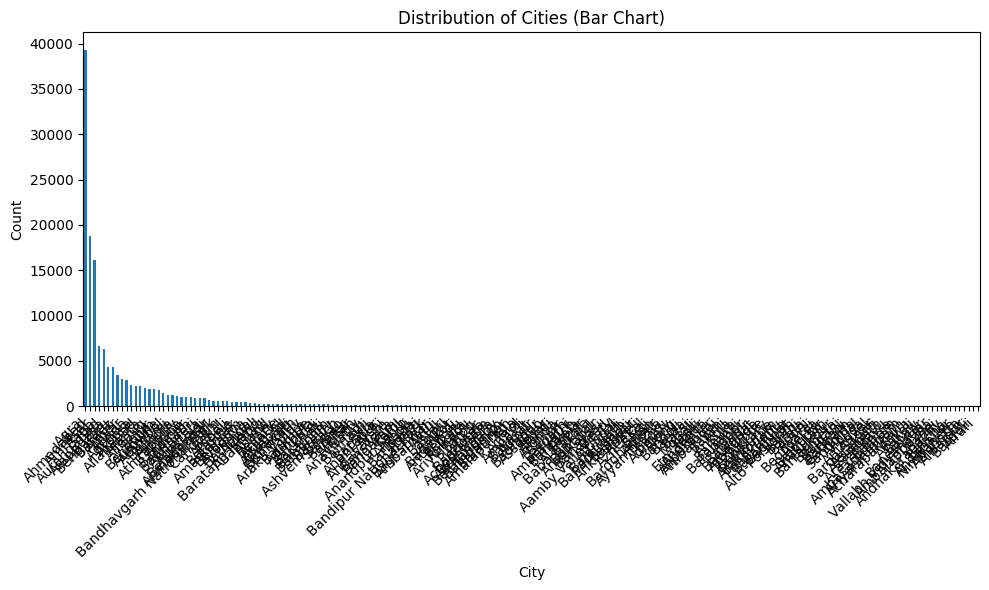

In [36]:
# Plot a bar chart of city counts
plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Cities (Bar Chart)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

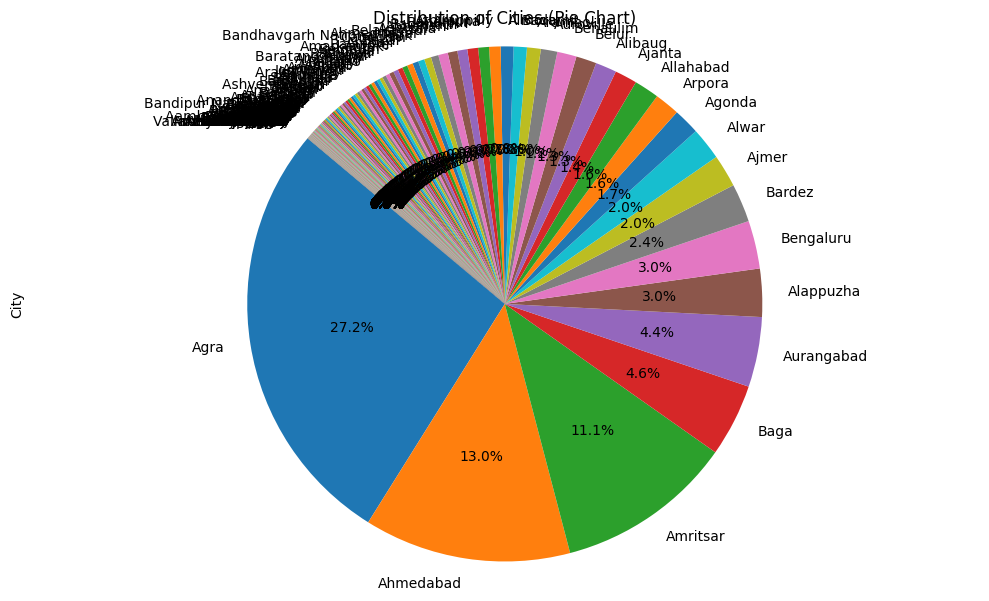

In [37]:
# Plot a pie chart of city counts
plt.figure(figsize=(10, 6))
city_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Cities (Pie Chart)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

In [38]:
ratings_by_city = data.groupby('City')['Rating'].mean()
print(ratings_by_city)


City
Aamby Valley City     4.588235
Abhaneri              4.202999
Acharapakkam          3.500000
Achooranam            4.136364
Achrol                4.823529
                        ...   
Saligao               4.325444
Sangolda              4.000000
Tajganj               4.750000
Tala                  4.617647
Vallabh Vidyanagar    5.000000
Name: Rating, Length: 196, dtype: float64


In [40]:
reviews_by_city = data.groupby('City')['Review'].apply(list)
print(reviews_by_city['Aamby Valley City'])  # Example


['aamby valley beautiful place clear blue skies fresh green grass family visited aamby valley celebrate mother birthday mom splendid time thanks pinky bharadwaj handling booking bombay', 'executed obt akshay thanx team thoroughly enjoyed especially frame treasure hunt', 'awesome experience atv tracts obstacles maintained safe challenging blast good experience helpful instructors', 'visited aamby valley yesterday short excursion trip mumbai drove travel time approx hours city clean away polluted air mumbai lunch woodpecker hotel truly impressed', 'far mumbai place finest adventure places visited recent times worth going safety standards maintained enjoy', 'yearn adrenaline rush place try atv forester mins rush loads stuff including kiddie zip line liked beautiful mountain backdrop whizz', 'great adventure place recommend x jungle safari special thanks mr rajesh offers zorbing rappelling wall climbing paintball following international safety standards equipments maintained', 'visited adv